In [ ]:
This work done by Maram Alshehri - Mahila  Almutairi - Abeer Alzahrani - Sara Alhadrami

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from sklearn.svm import SVC

DATADIR = "C:/Users/Desktop/code-CNN"
CATEGORIES = [ "Rothana","SukkaryMofetiland" ,"Ajwa"]



In [ ]:

########################## Function to prepre the dataset ############################
dataset = []
IMG_SIZE = 50

def create_data():
    for category in CATEGORIES: 

        # create path to "Ajwa", "Rothana","SukkaryMofetiland"
        path = os.path.join(DATADIR,category)

        # get the classification  (0 , 1, 2). 0=Rothana 1=SukkaryMofetiland , 2= Ajwa
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):  # create path to "Ajwa", "Rothana","SukkaryMofetiland"
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                dataset.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

##########################   End  Function    ######################################
        

In [ ]:

#prepare X and Y to split the dataset into test and train

create_data()            
X = []
y = []

for features,label in dataset:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)




100%|██████████| 17/17 [00:00<00:00, 608.57it/s]


In [ ]:

#split the dataset into test and train 
xtrain, xtest , ytrain , ytest = train_test_split( X , y, test_size=0.25,random_state=0)

#reshape from 4D into 2D 
nsamples, nx, ny,d = xtrain.shape
d2_train_dataset = xtrain.reshape((nsamples,nx*ny*d))

nsamples, nx, ny,d = xtest.shape
d2_test_dataset = xtest.reshape((nsamples,nx*ny*d))


In [ ]:
##########################      SVM  Model     ######################################
model = SVC()
#Train the model 
model.fit(d2_train_dataset ,ytrain)
#Predict 
prediction=model.predict(d2_test_dataset)
#Reshape the array 
prediction= prediction.reshape(-1, 1)


###################### Calculate the accuracy of SVM model #########################
a = len(ytest)
sum = 0  
for i in range(a):
    if ytest[i]== prediction[i][0]:
        sum = sum +1

accuracy = sum/ len(prediction)
print('SVM model''s accuracy :', accuracy)


SVM models accuracy : 0.8461538461538461


In [ ]:

############################     KNN Model     #####################################
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
#Train the model 
classifier.fit(d2_train_dataset ,ytrain)
#Predict
y_pred=classifier.predict(d2_test_dataset)
y_pred= y_pred.reshape(-1, 1)


###################### Calculate the accuracy of KNN model #########################
c = 0  
for j in range(a):
    if ytest[j]== y_pred[j][0]:
        c = c +1
        
accuracy2 = c/len(y_pred)

print('KNN  Model''s accuracy :', accuracy2)



KNN  Models accuracy : 0.6923076923076923


In [ ]:
########################## Define function to test a new sample ##########################
def NewTest(path):
    
    # convert to array
    img_array = cv2.imread(path ,cv2.IMREAD_GRAYSCALE)
    # resize to normalize image size
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
    X = np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
   # reshape the array 
    nsamples, nx, ny,d = X.shape
    newtest = X.reshape((nsamples,nx*ny*d))
    
    ##KNN model
    y_pred=classifier.predict(newtest)
    #SVM model
    y_pred1=model.predict(newtest)
    
   #print the class SVM 
    if y_pred1[0] == 0:
        print ("The image by using SVM classifier is : Rothana")
    elif y_pred1[0] == 1:
       print ("The image by using SVM classifier is : SukkaryMofetiland")
    elif y_pred1[0] == 2:
        print ("The image by using SVM classifier is : Ajwa")
        
     #print the class KNN 
    if y_pred[0] == 0:
        print ("The image by using KNN classifier is : Rothana")
    elif y_pred[0] == 1:
        print ("The image by using KNN classifier is : SukkaryMofetiland")
    elif y_pred[0] == 2:
        print ("The image by using KNN classifier is : Ajwa")
      
        
##########################   End  Function    ##########################################
  

The image by using SVM classifier is : SukkaryMofetiland
The image by using KNN classifier is : SukkaryMofetiland


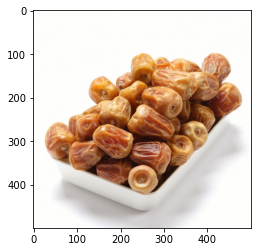

In [ ]:

###################### Test new image and print it with class #########################
#read path for a new image         

path = "C:/Users/Saraa/Desktop/code-CNN/SukkaryMofetiland/28.jpg"
#image = cv2.imread(path)

#print image 
#cv2.imshow('sample image',image)
#NewTest(path)
from keras.preprocessing.image import ImageDataGenerator, load_img
image2= load_img(path)
plt.imshow(image2)
NewTest(path)
